Описание данных:
* **name**: Имя персонажа
* **Title**: Социальный статус или знатность
* **House**: Дом, к которому принадлежит персонаж
* **Culture**: Социальная группа, к которой принадлежит персонаж
* **book1/2/3/4/5**: Появление персонажа в книге
* **Is noble**: Знатность персонажа, основанное на титуле
* **Age**: Отсчет времени: 305 AC
* **male**: Мужчина или женщина
* **dateOfBirth**: дата рождения
* **Spouse**: Имя супруги\а персонажа
* **Father**: Имя отца персонажа
* **Mother**: Имя матери персонажа
* **Heir**: Имя наследника персонажа
* **Is married**: Represents whether the character is married
* **Is spouse alive**: Represents whether character's spouse is alive
* **Is mother alive:** Жива ли мать персонажа
* **Is heir alive:** Жив ли наследник персонажа
* **Is father alive:** Указывает, жив ли отец персонажа
* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан
* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org
Целевая переменная:
* **isAlive**: жив ли персонаж в книге

### Часть 1. Анализ данных

#### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
data_train = pd.read_csv('game_of_thrones_train.csv', sep=',')
data_test = pd.read_csv('game_of_thrones_test.csv', sep=',')

In [3]:
train_colls = data_train.columns
test_colls = data_test.columns
len(set(test_colls) - set(train_colls)), len(set(train_colls) - set(test_colls))

(0, 1)

In [4]:
train_colls

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [5]:
data_train.isna().any()

S.No                False
name                False
title                True
male                False
culture              True
dateOfBirth          True
mother               True
father               True
heir                 True
house                True
spouse               True
book1               False
book2               False
book3               False
book4               False
book5               False
isAliveMother        True
isAliveFather        True
isAliveHeir          True
isAliveSpouse        True
isMarried           False
isNoble             False
age                  True
numDeadRelations    False
popularity          False
isAlive             False
dtype: bool

In [6]:
data_train.describe()

,S.No,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,779.000000,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,449.611499,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,1.000000,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,390.000000,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,779.000000,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1168.000000,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1557.000000,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [7]:
submission = pd.read_csv('submission.csv', sep=',')

In [8]:
submission[~submission['S.No'].isin(data_test['S.No'])]

,S.No,isAlive


In [9]:
data_test[~data_test['S.No'].isin(submission['S.No'])]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity


In [10]:
data_test[data_test['S.No'] == 1]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity


#### **Задание 1.3.** Предобработка (очистка) данных.

In [11]:
data_train.isna().any()

S.No                False
name                False
title                True
male                False
culture              True
dateOfBirth          True
mother               True
father               True
heir                 True
house                True
spouse               True
book1               False
book2               False
book3               False
book4               False
book5               False
isAliveMother        True
isAliveFather        True
isAliveHeir          True
isAliveSpouse        True
isMarried           False
isNoble             False
age                  True
numDeadRelations    False
popularity          False
isAlive             False
dtype: bool

#### **Задание 1.4.** Числовые признаки

In [12]:
y_train = data_train['isAlive'].tolist()
data_train.drop(columns='isAlive', inplace=True)

In [13]:
[column for column in data_train.columns if data_train[column].dtype != 'object']

['S.No',
 'male',
 'dateOfBirth',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity']

##### 'S.No'

In [14]:
# data_train.drop(columns='S.No', inplace=True)
# data_test.drop(columns='S.No', inplace=True)

##### 'dateOfBirth'

In [15]:
# Заполняем NaN медианой
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
simple_imputer.fit(data_train[['dateOfBirth']])
data_train['dateOfBirth'] = simple_imputer.transform(data_train[['dateOfBirth']])

In [16]:
data_test['dateOfBirth'] = simple_imputer.transform(data_test[['dateOfBirth']])

In [17]:
data_test[data_test['S.No'] == 1]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity


##### 'book1 - 5'

In [18]:
data_test['book1'].isna().sum()

np.int64(0)

In [19]:
data_test['book2'].isna().sum()

np.int64(0)

In [20]:
data_test['book3'].isna().sum()

np.int64(0)

In [21]:
data_test['book4'].isna().sum()

np.int64(0)

In [22]:
data_test['book5'].isna().sum()

np.int64(0)

##### isAliveMother

In [23]:
data_train['isAliveMother'].isna().sum()

np.int64(1539)

In [24]:
data_train.drop(columns='isAliveMother', inplace=True)
data_test.drop(columns='isAliveMother', inplace=True)

##### isAliveFather

In [25]:
data_train['isAliveFather'].isna().sum()

np.int64(1535)

In [26]:
data_train.drop(columns='isAliveFather', inplace=True)
data_test.drop(columns='isAliveFather', inplace=True)

##### isAliveHeir

In [27]:
data_train['isAliveHeir'].isna().sum()

np.int64(1536)

In [28]:
data_train.drop(columns='isAliveHeir', inplace=True)
data_test.drop(columns='isAliveHeir', inplace=True)

##### isAliveSpouse

In [29]:
data_train['isAliveSpouse'].isna().sum(), len(data_train)

(np.int64(1357), 1557)

In [30]:
data_train.drop(columns='isAliveSpouse', inplace=True)
data_test.drop(columns='isAliveSpouse', inplace=True)

##### isMarried

In [31]:
data_train['isMarried'].isna().sum(), len(data_train)

(np.int64(0), 1557)

##### isNoble

In [32]:
data_train['isNoble'].isna().sum(), len(data_train)

(np.int64(0), 1557)

In [33]:
data_test[data_test['S.No'] == 1]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity


##### age

In [34]:
data_train['age'].isna().sum(), len(data_train)

(np.int64(1278), 1557)

In [35]:
# Заполняем NaN медианой
simple_imputer_age = SimpleImputer(missing_values=np.nan, strategy='median')
simple_imputer_age.fit(data_train[['age']])
data_train['age'] = simple_imputer_age.transform(data_train[['age']])

In [36]:
data_test['age'] = simple_imputer_age.transform(data_test[['age']])

In [37]:
data_test[data_test['S.No'] == 1]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity


##### numDeadRelations

In [38]:
data_train['numDeadRelations'].isna().sum(), len(data_train)

(np.int64(0), 1557)

In [39]:
data_train['numDeadRelations'].value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
12       1
11       1
15       1
9        1
Name: count, dtype: int64

In [40]:
data_train.loc[data_train['numDeadRelations'] > 0, 'numDeadRelations'] = 1
data_test.loc[data_test['numDeadRelations'] > 0, 'numDeadRelations'] = 1

##### popularity

In [41]:
data_train['popularity'].isna().sum(), len(data_train)

(np.int64(0), 1557)

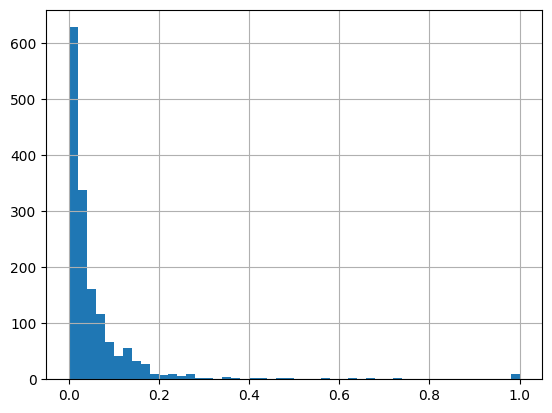

In [42]:
hist = data_train['popularity'].hist(bins=50)

In [43]:
data_train["popularity"] = data_train["popularity"].apply(lambda x: np.log10(x * 150 + 1))
data_test["popularity"] = data_test["popularity"].apply(lambda x: np.log10(x * 150 + 1))

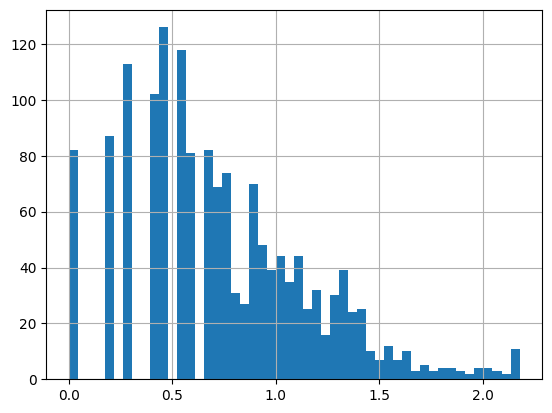

In [44]:
hist = data_train['popularity'].hist(bins=50)

In [45]:
data_test[data_test['S.No'] == 1]

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity


#### **Задание 1.5.** Категориальные признаки с большим количеством категорий

In [46]:
[column for column in data_train.columns if data_train[column].dtype == 'object']

['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']

##### name

In [47]:
data_train.name.isna().sum()

np.int64(0)

In [48]:
len(data_train.name.unique())

1557

In [49]:
data_train.drop(columns='name', inplace=True)
data_test.drop(columns='name', inplace=True)

##### mother

In [50]:
data_train.mother.isna().sum(), len(data_train)

(np.int64(1539), 1557)

In [51]:
data_train.drop(columns='mother', inplace=True)
data_test.drop(columns='mother', inplace=True)

##### father

In [52]:
data_train.father.isna().sum(), len(data_train)

(np.int64(1535), 1557)

In [53]:
data_train.drop(columns='father', inplace=True)
data_test.drop(columns='father', inplace=True)

##### spouse

In [54]:
data_train.spouse.isna().sum(), len(data_train)

(np.int64(1357), 1557)

In [55]:
data_train.drop(columns='spouse', inplace=True)
data_test.drop(columns='spouse', inplace=True)

##### heir

In [56]:
data_train.heir.isna().sum(), len(data_train)

(np.int64(1536), 1557)

In [57]:
data_train.drop(columns='heir', inplace=True)
data_test.drop(columns='heir', inplace=True)

In [58]:
data_train.title.isna().sum(), len(data_train)

(np.int64(840), 1557)

##### culture

In [59]:
data_train.culture.isna().sum(), len(data_train)

(np.int64(1069), 1557)

In [60]:
data_train.drop(columns='culture', inplace=True)
data_test.drop(columns='culture', inplace=True)

##### house

In [61]:
data_train.house.isna().sum(), len(data_train)

(np.int64(381), 1557)

In [62]:
data_train.loc[data_train['house'] == 1, 'house'] = "1"
data_test.loc[data_test['house'] == 1, 'house'] = "1"

In [63]:
house_columns = data_train.house.value_counts().reset_index()['house'].tolist()[0:5]

In [64]:
data_train.loc[~data_train['house'].isin(house_columns), 'house'] = 'house_other'
data_test.loc[~data_test['house'].isin(house_columns), 'house'] = 'house_other'

In [65]:
data_train.house.value_counts()

house
house_other        1248
House Frey           89
Night's Watch        88
House Stark          56
House Targaryen      40
House Lannister      36
Name: count, dtype: int64

##### title

In [66]:
data_train.loc[data_train['title'].isna(), 'title'] = 'not_title'
data_test.loc[data_test['title'].isna(), 'title'] = 'not_title'

In [67]:
data_train.loc[data_train['title'] == 1, 'title'] = '1'
data_test.loc[data_test['title'] == 1, 'title'] = '1'

In [68]:
data_train['title'] = data_train['title'].apply(lambda x: x.lower())
data_test['title'] = data_test['title'].apply(lambda x: x.lower())

In [69]:
data_train.title.value_counts()[0:20]

title
not_title                              840
ser                                    306
maester                                 29
archmaester                             21
lord                                    19
septon                                  16
winterfell                              15
lady                                    10
septa                                    9
princess                                 9
king in the north                        9
cupbearer                                8
lord commander of the night's watch      8
prince                                   7
grand maester                            6
wisdom                                   5
khal                                     5
king-beyond-the-wall                     4
prince of dragonstone                    4
eyrie                                    3
Name: count, dtype: int64

In [70]:
data_train.loc[data_train['title'].str.contains('ser '), 'title'] = 'ser'
data_test.loc[data_test['title'].str.contains('ser '), 'title'] = 'ser'

In [71]:
data_train.loc[data_train['title'].str.contains('maester'), 'title'] = 'maester'
data_test.loc[data_test['title'].str.contains('maester'), 'title'] = 'maester'

In [72]:
data_train.loc[data_train['title'].str.contains('lord '), 'title'] = 'lord'
data_test.loc[data_test['title'].str.contains('lord '), 'title'] = 'lord'

In [73]:
data_train.loc[data_train['title'].str.contains('septa'), 'title'] = 'septon'
data_test.loc[data_test['title'].str.contains('septa'), 'title'] = 'septon'

In [74]:
data_train.loc[data_train['title'].str.contains('lady '), 'title'] = 'lady'
data_test.loc[data_test['title'].str.contains('lady '), 'title'] = 'lady'

In [75]:
data_train.loc[data_train['title'].str.contains('king'), 'title'] = 'king'
data_test.loc[data_test['title'].str.contains('king'), 'title'] = 'king'

In [76]:
title_columns = data_train.title.value_counts().reset_index()['title'].tolist()[0:9]

In [77]:
data_train.loc[~data_train['title'].isin(title_columns), 'title'] = 'title_other'
data_test.loc[~data_test['title'].isin(title_columns), 'title'] = 'title_other'

In [78]:
data_train.describe()

,S.No,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,779.000000,0.590880,267.619139,0.138728,0.327553,0.431599,0.562620,0.330122,0.128452,0.439306,26.023121,0.044316,0.743786
std,449.611499,0.491829,27.655486,0.345774,0.469472,0.495458,0.496223,0.470408,0.334700,0.496462,11.956196,0.205862,0.440115
min,1.000000,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,390.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.478089
50%,779.000000,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.654341
75%,1168.000000,1.000000,272.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,24.000000,0.000000,1.022501
max,1557.000000,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.178977


In [79]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              1557 non-null   int64  
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   dateOfBirth       1557 non-null   float64
 4   house             1557 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isMarried         1557 non-null   int64  
 11  isNoble           1557 non-null   int64  
 12  age               1557 non-null   float64
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
dtypes: float64(3), int64(10), object(2)
memory usage: 182.6+ KB


In [80]:
categorical_columns = ['title', 'house']

In [81]:
ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
ohe.fit(data_train[categorical_columns])
new_category_columns = ohe.transform(data_train[categorical_columns])

In [82]:
ohe.get_feature_names_out()

array(['title_king', 'title_lady', 'title_lord', 'title_maester',
       'title_not_title', 'title_princess', 'title_septon', 'title_ser',
       'title_title_other', 'title_winterfell', 'house_House Frey',
       'house_House Lannister', 'house_House Stark',
       'house_House Targaryen', "house_Night's Watch",
       'house_house_other'], dtype=object)

In [83]:
new_train_columns = pd.DataFrame(new_category_columns, columns=ohe.get_feature_names_out())
data_train = data_train.drop(columns=categorical_columns)
data_train = pd.concat([data_train, new_train_columns], axis=1)
data_train.head()

,S.No,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,...,title_septon,title_ser,title_title_other,title_winterfell,house_House Frey,house_House Lannister,house_House Stark,house_House Targaryen,house_Night's Watch,house_house_other
0,1,1,272.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,208.0,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,272.0,0,0,0,1,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,82.0,0,0,0,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,276.0,0,0,0,1,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
new_category_columns_test = ohe.transform(data_test[categorical_columns])
new_test_columns = pd.DataFrame(new_category_columns_test, columns=ohe.get_feature_names_out())
data_test = data_test.drop(columns=categorical_columns)
data_test = pd.concat([data_test, new_test_columns], axis=1)
data_test.head()

,S.No,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,...,title_septon,title_ser,title_title_other,title_winterfell,house_House Frey,house_House Lannister,house_House Stark,house_House Targaryen,house_Night's Watch,house_house_other
0,1558,0,156.0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1559,0,272.0,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1560,0,272.0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1561,1,272.0,1,1,1,1,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1562,1,262.0,1,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### **Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [97]:
data_train.columns

Index(['S.No', 'male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'title_king', 'title_lady', 'title_lord', 'title_maester',
       'title_not_title', 'title_princess', 'title_septon', 'title_ser',
       'title_title_other', 'title_winterfell', 'house_House Frey',
       'house_House Lannister', 'house_House Stark', 'house_House Targaryen',
       'house_Nights Watch', 'house_house_other'],
      dtype='object')

In [94]:
data_train.rename(columns={"house_Night's Watch": "house_Nights Watch"}, inplace=True)
data_test.rename(columns={"house_Night's Watch": "house_Nights Watch"}, inplace=True)

In [98]:
target_cols = [
    'male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'title_king', 'title_lady', 'title_lord', 'title_maester',
       'title_not_title', 'title_princess', 'title_septon', 'title_ser',
       'title_title_other', 'title_winterfell', 'house_House Frey',
       'house_House Lannister', 'house_House Stark', 'house_House Targaryen',
       'house_Nights Watch', 'house_house_other'
]

In [99]:
X = data_train[target_cols].copy()
y = y_train.copy()

#### **Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [101]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

### Часть 2. Обучение моделей

#### **Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [110]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\petr\PycharmProjects\DLS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
clf.fit(X_train, y_train)

C:\Users\petr\PycharmProjects\DLS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
y_pred = clf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8205128205128205


In [113]:
clf.score(X_train, y_train)

0.8313253012048193

In [114]:
clf.score(X_val, y_val)

0.8205128205128205

In [116]:
y_test = clf.predict(data_test[target_cols])

In [119]:
submission['isAlive'] = y_test

In [121]:
submission.to_csv('my_submission.csv', sep=',', index=False)